In [194]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [195]:
bankloan1 = pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')

In [196]:
bankloan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [197]:
bankloan1.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [236]:
bankloan1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [198]:
bankloan1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [199]:
bankloan1.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [200]:
# The people who accepted the personal loan among the people who have been approached is 
# very less so there are lot of room for error in the model i.e the model may be more biased 
# towards people who dint get the loan among the people who have been approached by the bank.

In [201]:
bankloan2 = bankloan1.drop('ZIP Code', axis =1)

In [202]:
#bankloan2

In [203]:
bankloan2 = bankloan2.drop('ID',axis=1)

In [204]:
bankloan2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [205]:
bankloan3 = bankloan2[['Age','Experience','Income','Family','CCAvg','Education',
                        'Mortgage','Securities Account','CD Account','Online','CreditCard','Personal Loan']]

In [206]:
bankloan3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


C:\Users\SONY\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


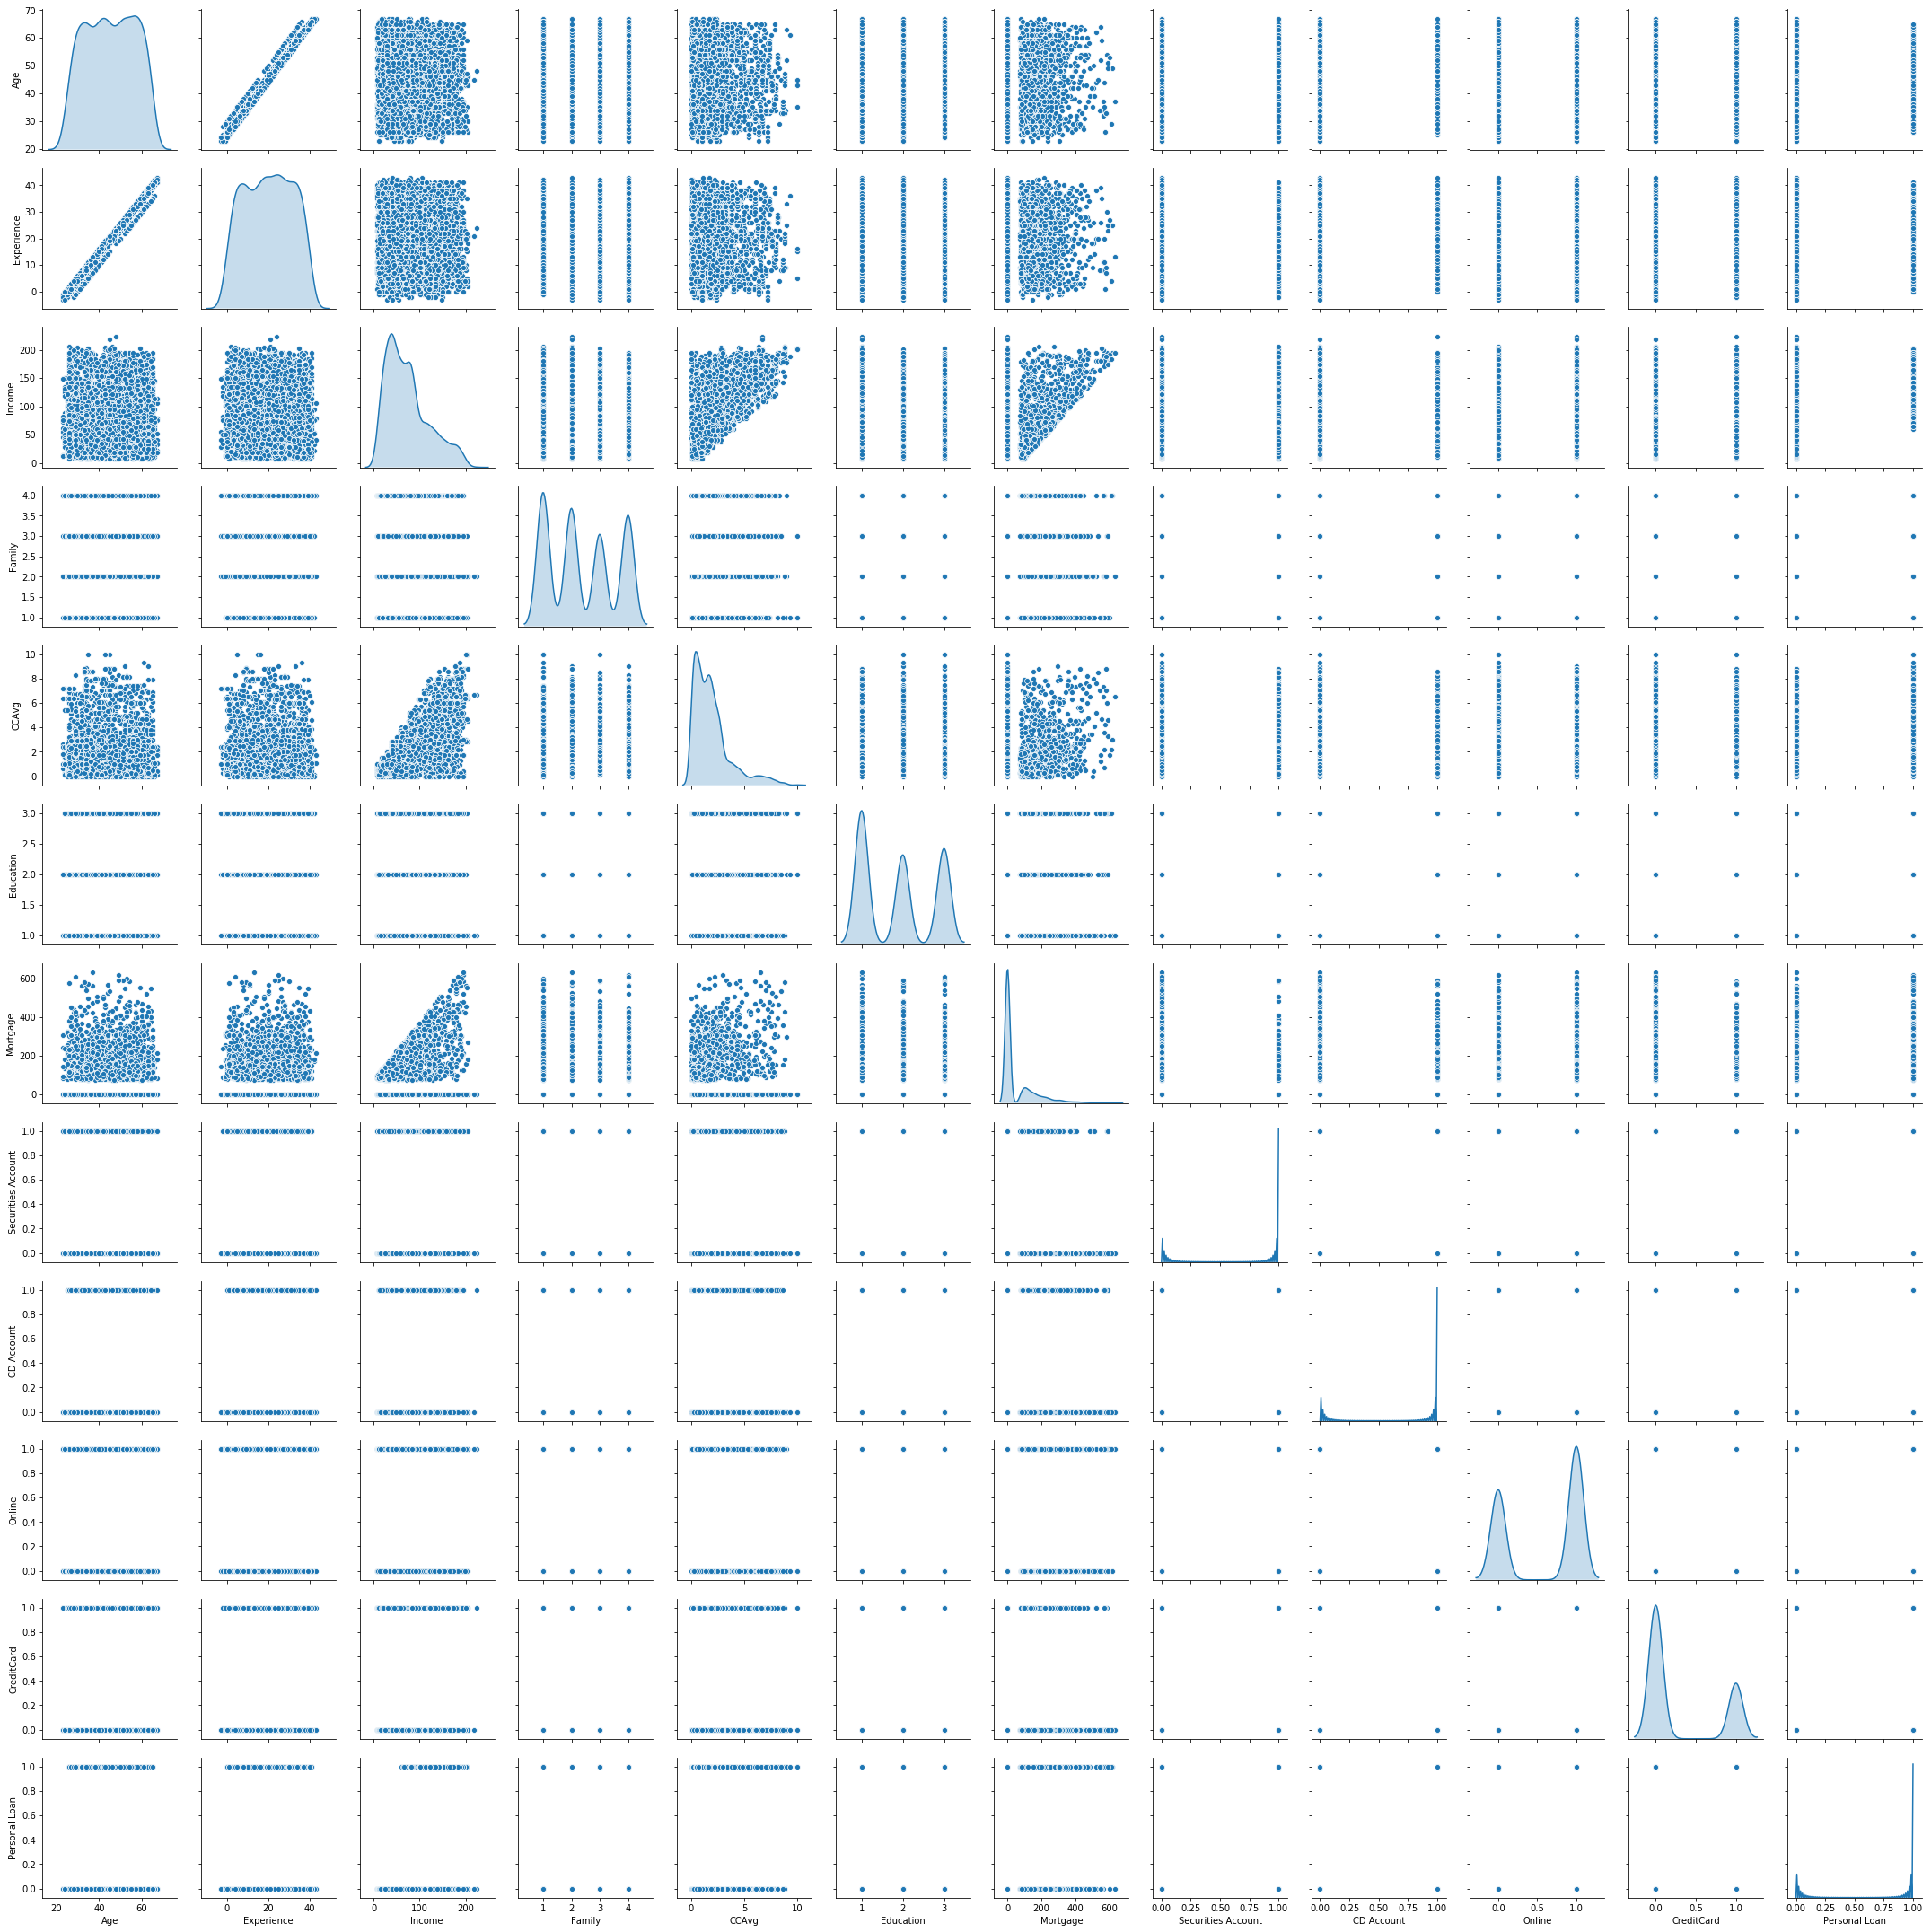

In [237]:
sns.pairplot(bankloan3, diag_kind = 'kde')

In [208]:
# The age and experience columns looks almost symmetric meaning people from all age and experience 
# have been approached by the bank. The income group looks right skewed meaning that there are more people from 
# low income group who have been approached. The CCAvg attribute also look right skewed meaning that more people from 
# low CCAvg average have been approached for personal loan. The mortgage column also look right skewed.

In [214]:
X = bankloan3.iloc[:,0:10]
y = bankloan3.iloc[:,11]
#X = array[:,0:8] # select all rows and first 11 columns which are the attributes
#Y = array[:,8]   # select all rows and the 11th column which is the classification "Yes", "No" for personal laon
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [215]:
#Building a logistic model

In [216]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [217]:
column2 = ['Age','Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
                                           'Securities Acc', 'CD Account', 'Online']
coef_bankloan3 = pd.DataFrame(model1.coef_, columns = column2)
coef_bankloan3['intercept'] = model1.intercept_
print(coef_bankloan3)

        Age  Experience    Income    Family    CCAvg  Education  Mortgage  \
0 -0.412083    0.411462  0.049083  0.649466  0.16375   1.667766  0.000891   

   Securities Acc  CD Account   Online  intercept  
0       -0.709699    2.592347 -0.49169  -2.533116  


In [ ]:
# Here the coefficient of Age is negative so the log of odds i.e P(Y=1) i.e the probability of a person taking 
# a personal loan decreases with age
# All the other attributes have coefficients that are positive so the probability of a person
# taking a personal loan from the bank increases with experience, Income, Family size, Education level 
# and Mortgae that a person pays.

In [222]:
y_predict1 = model1.predict(X_test)
model_score1 = model1.score(X_test, y_test)

print(model_score1)
print(metrics.confusion_matrix(y_test, y_predict1))

0.944
[[1331   20]
 [  64   85]]


In [ ]:
# Here we have accuratly predited that 1331 people have not got the loan(True Negative) but 20 people have been 
# inaccuratly predicted as if they got the loan when they actually did not get the loan (False positive)
# 85 people have been accuratly predicted that they have got a personal loan with the bank (True Positive) and
# 65 people have been inaccuratly predicted as if they did not get the loan (False Negative). This may be because 
# there are more people who did not take the loan from the bank than the people who took the loan 
# so the result may biased towards people who did not take the loan. 

In [223]:
# Logistic Regression performed with scaling
# To scale the dimensions, we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the bankloan3 data. This will produce a numpy array
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [224]:
# Fit the model
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)
y_predict2 = model2.predict(X_test_scaled)
model_score = model2.score(X_test_scaled, y_test)
print(model_score)

0.946


C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [225]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_predict2)
print(cm)
#Precision_model2 = cm[1,1]/(cm[1,1]+cm[0,1])
#Recall_model2 = cm[1,1]/(cm[1,1]+cm[1,0])
#print(Precision_model2, Recall_model2)

[[1332   19]
 [  62   87]]


In [ ]:
# Here we have accuratly predited that 1332 people have not got the loan(True Negative) but 19 people have been 
# inaccuratly predicted as if they got the loan when they actually did not get the loan (False positive)
# 87 people have been accuratly predicted that they have got a personal loan with the bank (True Positive) and
# 62 people have been inaccuratly predicted as if they did not get the loan (False Negative). The results have 
# slightly improved and the score also has improved to 0.946 but still not good enough. It is 
# largely because there are 4520 customers who did not take the laon offer but the number of 
# customers who took the loan is 480 so there is a huge bias in the customers taking the loan from the bank so
# because of this bias we cannot guess if a customer will get a loan from this bank or not with good precision 
# using our model.
# We can see if we can still improve the score and reduce the false positive and 
# the False negative numbers in the confusion matrix by selecting only the attributes
# that are significant for the problem.

In [ ]:
# We are going to use ststmodel api to build a model using the logit function to select the 
# features more significant for the model and see if the score of the model improves.

In [41]:
import statsmodels.api as sm

In [63]:
logit = sm.Logit(y_train, X_train_scaled)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.617998
         Iterations 6


In [64]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: -0.975   
Dependent Variable: Personal Loan    AIC:              4345.9868
Date:               2019-07-19 18:53 BIC:              4407.5920
No. Observations:   3500             Log-Likelihood:   -2163.0  
Df Model:           9                LL-Null:          -1095.5  
Df Residuals:       3490             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       -0.3823     0.3541   -1.0798   0.2802   -1.0763    0.3116
x2        0.3933     0.3542    1.1105   0.2668   -0.3009    1.0876
x3        0.6144     0.0524   11.7296   0.0000    0.5117    0.7171
x4        0.1849     0.0373    4.9617   0.0000    0.1119    0.2580
x5        0.1575     0.0505    3.1208   0.0018    0.0586    0.2563
x6        0.3136     0.0392    7.9904   0.0000    0.2367    0.3905
x7        0.0574     0.0394    1.4561   0.1454   -0.0199    0.1347
x8       -0.1160     0.0408   -2.8420   0.0045   -0.1960   -0.0360
x9        0.4676     0.0544    8.6022   0.0000    0.3610    0.5741
x10      -0.0512     0.0367   -1.3957   0.1628   -0.1230    0.0207
================================================================

"""

In [46]:
# Here from the p value we see that only the features that have p value 
# less than 0.05 are significant. we see that only x3,x4,x5,x6,x8,x9 are significant which are
# Family, CCAvg, Education, Mortgage, CDAccount, Online attributes. Only these features are significant.

In [76]:
bankloan5 = bankloan3[['Family','CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online', 'Personal Loan']]

In [77]:
bankloan5.head()

,Family,CCAvg,Education,Mortgage,CD Account,Online,Personal Loan
0,4,1.6,1,0,0,0,0
1,3,1.5,1,0,0,0,0
2,1,1.0,1,0,0,0,0
3,1,2.7,2,0,0,0,0
4,4,1.0,2,0,0,0,0


In [226]:
# Building the model again with only the selected features

In [78]:
X2 = bankloan5.iloc[:,0:5]
y2 = bankloan5.iloc[:,6]
#X = array[:,0:8] # select all rows and first 11 columns which are the attributes
#Y = array[:,8]   # select all rows and the 11th column which is the classification "Yes", "No" for personal laon
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=test_size, random_state=seed)


In [105]:
logit2 = sm.Logit(y2_train, X2_train)
logit_model2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.332863
         Iterations 7


In [72]:
logit_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: -0.063   
Dependent Variable: Personal Loan    AIC:              2340.0422
Date:               2019-07-19 18:56 BIC:              2370.8448
No. Observations:   3500             Log-Likelihood:   -1165.0  
Df Model:           4                LL-Null:          -1095.5  
Df Residuals:       3495             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Family      -0.6250    0.0451  -13.8604  0.0000  -0.7134  -0.5366
CCAvg        0.1534    0.0234    6.5611  0.0000   0.1075   0.1992
Education   -0.6476    0.0537  -12.0503  0.0000  -0.7529  -0.5422
Mortgage     0.0005    0.0005    1.0272  0.3043  -0.0004   0.0014
CD Account   2.1560    0.1637   13.1721  0.0000   1.8352   2.4768
================================================================

"""

In [73]:
X2_train_scaled = preprocessing.scale(X2_train)
X2_test_scaled = preprocessing.scale(X2_test)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [112]:
# Checking if the LogisticRegression function yields a better result with only selected attributes.

In [113]:
model3 = LogisticRegression()
model3.fit(X2_train, y2_train)
y_predict3 = model3.predict(X2_test)
model_score2 = model3.score(X2_test, y2_test)
print(model_score2)


0.92


C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [114]:
cm2 = metrics.confusion_matrix(y2_test, y_predict3)
print(cm)

[[1337   14]
 [ 104   45]]


In [ ]:
# The results have gotten worst by excluding the other attributes other than the ones that are significant 
# because now 104 number of people who actaully got the loan is now predicted as if they didnt get the loan. 
# So the feature selection we did, did not improve the situation and we have to accept the fact that the
# data is highly biased towards people who did not get the loan. so fteching more data which contains people
# who actually got the loan may improve the situation

In [121]:
# Using Naive Bayse to model the data

In [36]:
modelNB = GaussianNB()

In [37]:
modelNB.fit(X_train, y_train)
print(modelNB)

GaussianNB(priors=None, var_smoothing=1e-09)


In [39]:
expected = y_test
predicted = modelNB.predict(X_test)
# summary of the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500

[[1228  123]
 [  65   84]]


In [117]:
# Here we have correctly predited that 1228 people have not got the loan(True Negative) but 123 people have been 
# inaccuratly predicted as if they got the loan when they actually did not get the loan (False Positive)
# 84 people have been accuratly predicted that they have got a personal loan with the bank (True Positive) and
# 65 people have been inaccuratly predicted as if they did not get the loan (False Negative)
# Here the model is not very good at predicting positive for people who got 
# personal loan from the campaign which is evident from the precision value which is 0.41 mainly because the
# model has erraneously identified 123 people who did not get the personal loan as if they got the loan
# But the model has done comparetively well in predicting people who did not get the loan. 
# This has happened mainly because in the data set there are more people who did not get the loan than people who
# got the loan so the data is highly biased towards people who didn;t take the loan so it will be less precise in 
# determining if a person has taken a loan from the bank. So fetching more data containing people 
# who got personal loan may improve the model.

In [118]:
# Trying the KNN model for the same data set

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
from scipy.stats import zscore

In [122]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [227]:
# standardizing the attributes

In [124]:
bankloan3_z = bankloan3.apply(zscore)

In [125]:
bankloan3_z.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-5.565326e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-3.258753e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-3.258753e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-3.258753e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,-3.258753e-01
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,3.068659e+00


In [126]:
X3 = bankloan3.iloc[:,0:10]
y3 = bankloan3.iloc[:,11]
#X = array[:,0:8] # select all rows and first 11 columns which are the attributes
#Y = array[:,8]   # select all rows and the 11th column which is the classification "Yes", "No" for personal laon
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=test_size, random_state=seed)


In [ ]:
# Checking the optimal k value

In [183]:
score1 = []
for k in range(2,100):
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'distance')
    NNH.fit(X3_train, y3_train)
    predictedNNH = NNH.predict(X3_test)
    score1.append(NNH.score(X3_test,y3_test))

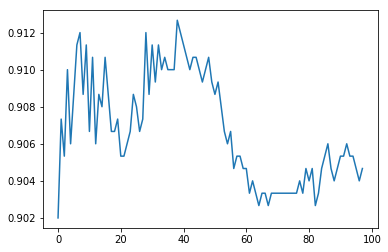

In [184]:
plt.plot(score1)


In [185]:
max_k = max(score1)
max_k_index = score1.index(max_k)
print(max_k)
print(max_k_index)
score1[39]

0.9126666666666666
38


0.912

In [ ]:
# Here we see that the maximum score for the KNN model was for k = 40 so let
# us run the program for k = 40

In [189]:
NNH = KNeighborsClassifier(n_neighbors = 40 , weights = 'distance')
NNH.fit(X3_train, y3_train)
predictedNNH = NNH.predict(X3_test)
NNH.score(X3_test,y3_test)

0.9126666666666666

In [190]:
print(metrics.confusion_matrix(y_test, predictedNNH))

[[1333   18]
 [ 113   36]]


In [191]:
# The KNN model has done pretty bad with predicting true positive for people who have taken the personal loan from
# bank and has inaccurately predicted that 133 people have not taken the loan (False Negative) when they 
# have actually taken the loan. So as far as predicting if a person will take a loan from the bank or not,
# the logistic regression has done the best job among the three models we tried so far

In [ ]:
# Conclusions:
# among the models, the logistic regression has given the best results but still the accuracy in 
# predicting if a custmer will take a personal loan or not from  the bank, is not good enough 
# even for the losistic regression so
# it is better to collect more data which contain positive results for the customer taking a loan from
# the bank.